# Micro Center Product Data Analysis

In [1]:
import MySQLdb
import configparser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Connect to MySQL database

In [2]:
config = configparser.ConfigParser()
config.read('config.cfg')

conn = MySQLdb.connect(host=config['mysqldb']['host'], db=config['mysqldb']['db'], user=config['mysqldb']['user'], passwd=config['mysqldb']['pass'])
cur = conn.cursor()

## Query data tables

In [3]:
category = pd.read_sql("SELECT * FROM category", con=conn)
brand = pd.read_sql("SELECT * FROM brand", con=conn)
store = pd.read_sql("SELECT * FROM store", con=conn)
product = pd.read_sql("SELECT * FROM product", con=conn)

In [4]:
category.head(2)

,category_id,category_name
0,1,Video Cards
1,2,Processors/CPUs


In [5]:
brand.head(2)

,brand_id,brand_name
0,1,ASUS
1,2,PowerColor


In [6]:
store.head(2)

,store_id,state_abv,city
0,101,CA,Tustin
1,181,CO,Denver


In [7]:
product.head(2)

,id,product_id,product_name,price,stock,store_id,rating,reviews,offer,brand_id,category_id
0,1,609586,GeForce RTX 2070 Super Dual Overclocked Dual-F...,529.99,10+ in stock,101,5 stars,(20 reviews),Get Rainbow 6 Siege Gold with select GeForce R...,1,1
1,2,610872,Radeon RX 5700 XT Red Devil Overclocked Triple...,419.99,10+ in stock,101,5 stars,(95 reviews),Buy select AMD RX 5000 Series graphics cards o...,2,1


## Data processing

In [8]:
product['stock'] = product['stock'].apply(lambda row : row.split(' ', 1)[0])
product['rating'] = product['rating'].replace('null', 'None')
product['reviews'] = product['reviews'].apply(lambda row : row.split(' ', 1)[0][1:]).replace('', '0').astype(int)

## Product Counts

In [9]:
product.merge(store.set_index('store_id'), on='store_id').groupby('city').product_name.agg({'count'})

,count
city,
Brentwood,127
Brooklyn,124
Cambridge,127
Chicago,127
Columbus,128
Dallas,126
Denver,126
Duluth,126
Fairfax,125


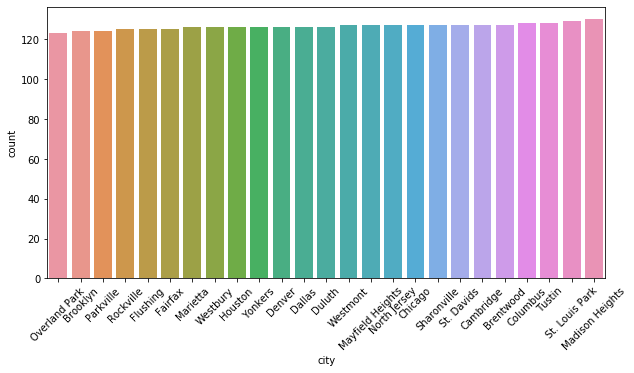

In [10]:
count = product.merge(store.set_index('store_id'), on='store_id').groupby('city').product_name.agg({'count'}).reset_index().sort_values('count')
plt.figure(figsize=(10,5))
count_plot = sns.barplot(x='city', y='count', data=count, order=count['city'])
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)
plt.show()

## Average Price of Products

In [11]:
product.merge(store.set_index('store_id'), on='store_id').merge(category.set_index('category_id'), on='category_id').groupby(['city', 'category_name']).agg({'price' : 'mean'})

price
city           category_name                 
Brentwood      Desktop Memory/RAM  104.615000
               Motherboards        259.406875
               Processors/CPUs     482.248065
               Video Cards         495.823333
Brooklyn       Desktop Memory/RAM   94.906667
               Motherboards        249.406875
               Processors/CPUs     481.061429
               Video Cards         480.615000
Cambridge      Desktop Memory/RAM  102.698333
               Motherboards        253.406875
               Processors/CPUs     453.054516
               Video Cards         459.365000
Chicago        Desktop Memory/RAM   96.240000
               Motherboards        250.156667
               Processors/CPUs     453.054516
               Video Cards         457.281667
Columbus       Desktop Memory/RAM  104.615000
               Motherboards        280.490208
               Processors/CPUs     459.365000
               Video Cards         576.656667
Dallas         Desktop Memory/RAM  102.031667
               Motherboards        235.656875
               Processors/CPUs     463.823333
               Video Cards         480.198333
Denver         Desktop Memory/RAM  101.448333
               Motherboards        235.510833
               Processors/CPUs     351.490000
               Video Cards         420.198333
Duluth         Desktop Memory/RAM  102.698333
               Motherboards        257.365208
...                                       ...
Rockville      Processors/CPUs     362.058966
               Video Cards         490.198333
Sharonville    Desktop Memory/RAM  104.615000
               Motherboards        265.177708
               Processors/CPUs     453.054516
               Video Cards         537.906667
St. Davids     Desktop Memory/RAM  101.490000
               Motherboards        251.281875
               Processors/CPUs     453.054516
               Video Cards         469.781667
St. Louis Park Desktop Memory/RAM  102.698333
               Motherboards        261.031667
               Processors/CPUs     466.808182
               Video Cards         529.365000
Tustin         Desktop Memory/RAM  102.698333
               Motherboards        244.969375
               Processors/CPUs     476.396250
               Video Cards         465.615000
Westbury       Desktop Memory/RAM  102.031667
               Motherboards        263.302708
               Processors/CPUs     458.156667
               Video Cards         375.406667
Westmont       Desktop Memory/RAM   93.656667
               Motherboards        243.802500
               Processors/CPUs     453.054516
               Video Cards         515.823333
Yonkers        Desktop Memory/RAM  101.615000
               Motherboards        261.594375
               Processors/CPUs     444.490000
               Video Cards         515.823333

[100 rows x 1 columns]

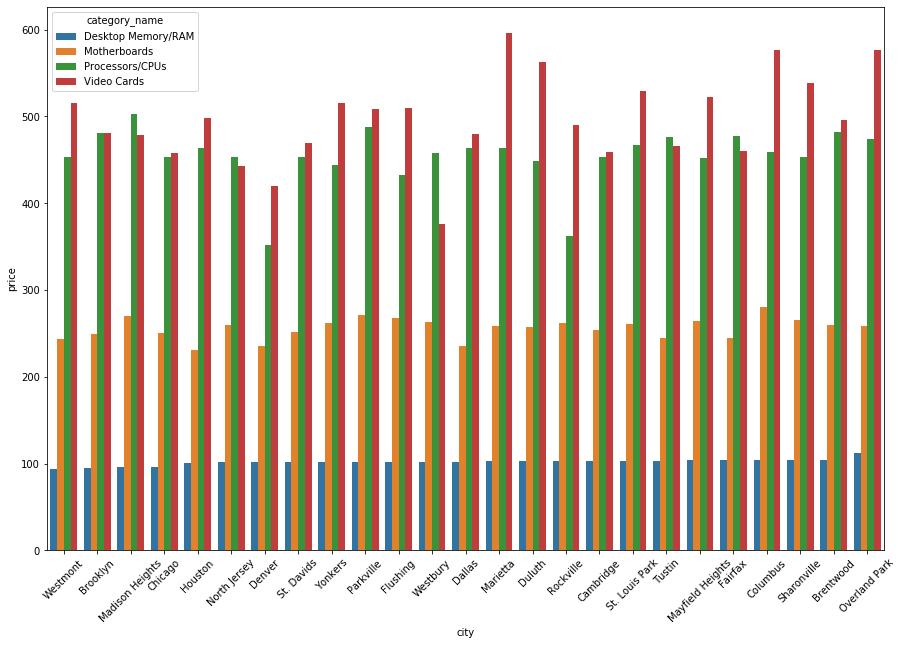

In [12]:
mean = product.merge(store.set_index('store_id'), on='store_id').merge(category.set_index('category_id'), on='category_id').groupby(['city', 'category_name']).agg({'price' : 'mean'}).reset_index().sort_values('price')

plt.figure(figsize=(15,10))
mean_plot = sns.barplot(x='city', y='price', hue='category_name', data=mean)
mean_plot.set_xticklabels(mean_plot.get_xticklabels(), rotation=45)
plt.show()

In [13]:
product.merge(brand.set_index('brand_id'), on='brand_id').merge(category.set_index('category_id'), on='category_id').groupby(['category_name', 'brand_name']).brand_name.agg({'count'}).reset_index()

,category_name,brand_name,count
0,Desktop Memory/RAM,Corsair,132
1,Desktop Memory/RAM,Crucial,147
2,Desktop Memory/RAM,G.Skill,280
3,Desktop Memory/RAM,Neo Forza,17
4,Desktop Memory/RAM,TeamGroup,24
5,Motherboards,ASRock,28
6,Motherboards,ASUS,626
7,Motherboards,Gigabyte,281
8,Motherboards,MSI,265
9,Processors/CPUs,AMD,368


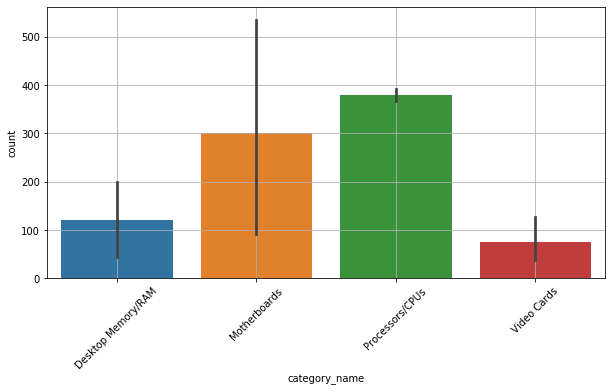

In [15]:
brand_count = product.merge(brand.set_index('brand_id'), on='brand_id').merge(category.set_index('category_id'), on='category_id').groupby(['category_name', 'brand_name']).brand_name.agg({'count'}).reset_index()

plt.figure(figsize=(10,5))
brand_count_plot = sns.barplot(x='category_name', y='count', data=brand_count)
brand_count_plot.set_xticklabels(brand_count_plot.get_xticklabels(), rotation=45)
plt.grid()
plt.show()

In [22]:
product.merge(brand.set_index('brand_id'), on='brand_id').merge(category.set_index('category_id'), on='category_id').groupby(['category_name', 'stock']).category_name.agg({'count'}).reset_index()

,category_name,stock,count
0,Desktop Memory/RAM,0,1
1,Desktop Memory/RAM,1,25
2,Desktop Memory/RAM,10,19
3,Desktop Memory/RAM,10+,425
4,Desktop Memory/RAM,2,17
5,Desktop Memory/RAM,3,14
6,Desktop Memory/RAM,4,22
7,Desktop Memory/RAM,5,18
8,Desktop Memory/RAM,6,13
9,Desktop Memory/RAM,7,14


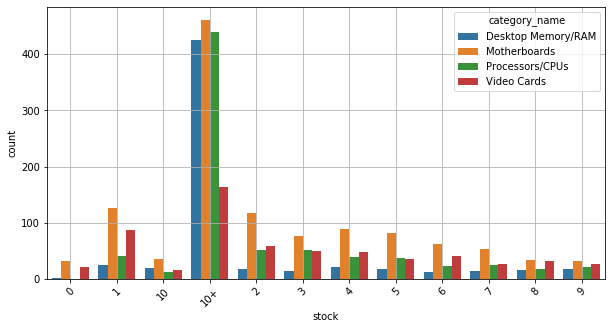

In [34]:
stock = product.merge(brand.set_index('brand_id'), on='brand_id').merge(category.set_index('category_id'), on='category_id').groupby(['category_name', 'stock']).category_name.agg({'count'}).reset_index()

plt.figure(figsize=(10,5))
stock_plot = sns.barplot(x='stock', y='count', hue='category_name', data=stock)
stock_plot.set_xticklabels(stock_plot.get_xticklabels(), rotation=45)
plt.grid()
plt.show()